In [ ]:
!pip install --upgrade --no-cache-dir gdown
!gdown 1JwIyR97fXRfaciFjm4NLualTzq2XaDTg

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Attempting uninstall: gdown
    Found existing installation: gdown 4.6.6
    Uninstalling gdown-4.6.6:
      Successfully uninstalled gdown-4.6.6
Downloading...
From (uriginal): https://drive.google.com/uc?id=1JwIyR97fXRfaciFjm4NLualTzq2XaDTg
From (redirected): https://drive.google.com/uc?id=1JwIyR97fXRfaciFjm4NLualTzq2XaDTg&confirm=t&uuid=1dcdb222-0de6-4e63-86b1-5ad65b356769
To: /content/archive.zip
100% 2.46G/2.46G [00:13<00:00, 182MB/s]


In [ ]:
import zipfile
zip_file_path = '/content/archive.zip'
folder_path = '/content/Dataset'
# Extract the zip file to the specified folder
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(folder_path)

In [ ]:
import os
file_path = "/content/archive.zip"
if os.path.exists(file_path):
    os.remove(file_path)
    print(f"{file_path} has been deleted successfully.")
else:
    print(f"{file_path} does not exist.")

/content/archive.zip has been deleted successfully.


In [ ]:
import os

# Define the path to the parent folder
parent_folder_path = "/content/Dataset"

# Recursively iterate through all subfolders and files in the parent folder
for dirpath, dirnames, filenames in os.walk(parent_folder_path):
    # Get the number of JPEG files in the current directory
    jpeg_count = sum(1 for filename in filenames if filename.lower().endswith('.jpeg'))
    
    # Print out the results for the current directory
    if jpeg_count > 0:
        # Get the relative path to the current directory
        relative_path = os.path.relpath(dirpath, parent_folder_path)
        
        # Print out the results
        print(f"{jpeg_count} (.jpeg) files are in {os.path.join(parent_folder_path, relative_path)}")


1341 (.jpeg) files are in /content/Dataset/chest_xray/train/NORMAL
3875 (.jpeg) files are in /content/Dataset/chest_xray/train/PNEUMONIA
1341 (.jpeg) files are in /content/Dataset/chest_xray/__MACOSX/chest_xray/train/NORMAL
3875 (.jpeg) files are in /content/Dataset/chest_xray/__MACOSX/chest_xray/train/PNEUMONIA
8 (.jpeg) files are in /content/Dataset/chest_xray/__MACOSX/chest_xray/val/NORMAL
8 (.jpeg) files are in /content/Dataset/chest_xray/__MACOSX/chest_xray/val/PNEUMONIA
234 (.jpeg) files are in /content/Dataset/chest_xray/__MACOSX/chest_xray/test/NORMAL
390 (.jpeg) files are in /content/Dataset/chest_xray/__MACOSX/chest_xray/test/PNEUMONIA
1341 (.jpeg) files are in /content/Dataset/chest_xray/chest_xray/train/NORMAL
3875 (.jpeg) files are in /content/Dataset/chest_xray/chest_xray/train/PNEUMONIA
8 (.jpeg) files are in /content/Dataset/chest_xray/chest_xray/val/NORMAL
8 (.jpeg) files are in /content/Dataset/chest_xray/chest_xray/val/PNEUMONIA
234 (.jpeg) files are in /content/Data

In [ ]:
import os
import shutil
from torch.utils.data import Dataset, DataLoader
from torchvision.datasets.folder import default_loader

# Set the path to your input folder here
input_folder_path = "/content/Dataset/chest_xray/chest_xray"

# Define the classes in your dataset
classes = ["NORMAL", "PNEUMONIA"]

# Define the path to the output folder where you want to save the combined data
output_folder_path = os.path.join(input_folder_path, "AllData")

# Create the output folder if it doesn't exist
if not os.path.exists(output_folder_path):
    os.makedirs(output_folder_path)

# Loop through the train, test, and val folders
for split in ["train", "test", "val"]:
    split_folder_path = os.path.join(input_folder_path, split)

    # Loop through the NORMAL and PNEUMONIA folders in each split folder
    for class_name in classes:
        class_folder_path = os.path.join(split_folder_path, class_name)

        # Loop through the image files in each class folder and copy them to the output folder
        for file_name in os.listdir(class_folder_path):
            if file_name.endswith(".jpeg"):
                src_path = os.path.join(class_folder_path, file_name)
                dst_path = os.path.join(output_folder_path, class_name, file_name)

                # Create the class folder in the output folder if it doesn't exist
                if not os.path.exists(os.path.join(output_folder_path, class_name)):
                    os.makedirs(os.path.join(output_folder_path, class_name))

                # Copy the image file to the output folder
                shutil.copyfile(src_path, dst_path)

# Define a custom PyTorch dataset to load the combined data
class CustomDataset(Dataset):
    def __init__(self, root, classes, transform=None, loader=default_loader):
        self.root = root
        self.classes = classes
        self.transform = transform
        self.loader = loader
        self.samples = []

        # Loop through the NORMAL and PNEUMONIA classes and their respective image folders in the output folder
        for class_name in classes:
            class_folder_path = os.path.join(root, class_name)
            for file_name in os.listdir(class_folder_path):
                if file_name.endswith(".jpeg"):
                    self.samples.append((os.path.join(class_folder_path, file_name), classes.index(class_name)))

    def __getitem__(self, index):
        path, target = self.samples[index]
        sample = self.loader(path)
        if self.transform is not None:
            sample = self.transform(sample)
        return sample, target

    def __len__(self):
        return len(self.samples)

# Load the combined data using the custom PyTorch dataset
dataset = CustomDataset(output_folder_path, classes)

# Use the PyTorch DataLoader to create batches of data for training/testing
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)


In [ ]:
import os
import shutil
import random

# Set the path to the "FinalDataset" folder
data_dir = "/content/Dataset/chest_xray/chest_xray/AllData"

# Set the path to the output directory
output_dir = "/content/FinalDatasetTVT2"

# Set the train/validation/test split ratios
train_ratio = 0.6
val_ratio = 0.2
test_ratio = 0.2

# Create the output directories
os.makedirs(os.path.join(output_dir, "train", "NORMAL"), exist_ok=True)
os.makedirs(os.path.join(output_dir, "train", "PNEUMONIA"), exist_ok=True)
os.makedirs(os.path.join(output_dir, "val", "NORMAL"), exist_ok=True)
os.makedirs(os.path.join(output_dir, "val", "PNEUMONIA"), exist_ok=True)
os.makedirs(os.path.join(output_dir, "test", "NORMAL"), exist_ok=True)
os.makedirs(os.path.join(output_dir, "test", "PNEUMONIA"), exist_ok=True)

# Get the list of image files in each class folder
normal_files = os.listdir(os.path.join(data_dir, "NORMAL"))
pneumonia_files = os.listdir(os.path.join(data_dir, "PNEUMONIA"))

# Shuffle the lists to randomize the order
random.shuffle(normal_files)
random.shuffle(pneumonia_files)

# Calculate the number of images for each split
num_normal = len(normal_files)
num_pneumonia = len(pneumonia_files)
num_train_normal = int(num_normal * train_ratio)
num_train_pneumonia = int(num_pneumonia * train_ratio)
num_val_normal = int(num_normal * val_ratio)
num_val_pneumonia = int(num_pneumonia * val_ratio)
num_test_normal = int(num_normal * test_ratio)
num_test_pneumonia = int(num_pneumonia * test_ratio)

# Copy the image files to the output directories for each split
for i, file in enumerate(normal_files):
    if i < num_train_normal:
        shutil.copy(os.path.join(data_dir, "NORMAL", file), os.path.join(output_dir, "train", "NORMAL"))
    elif i < num_train_normal + num_val_normal:
        shutil.copy(os.path.join(data_dir, "NORMAL", file), os.path.join(output_dir, "val", "NORMAL"))
    else:
        shutil.copy(os.path.join(data_dir, "NORMAL", file), os.path.join(output_dir, "test", "NORMAL"))
for i, file in enumerate(pneumonia_files):
    if i < num_train_pneumonia:
        shutil.copy(os.path.join(data_dir, "PNEUMONIA", file), os.path.join(output_dir, "train", "PNEUMONIA"))
    elif i < num_train_pneumonia + num_val_pneumonia:
        shutil.copy(os.path.join(data_dir, "PNEUMONIA", file), os.path.join(output_dir, "val", "PNEUMONIA"))
    else:
        shutil.copy(os.path.join(data_dir, "PNEUMONIA", file), os.path.join(output_dir, "test", "PNEUMONIA"))


In [ ]:
import os
import shutil
import random

# Set the path to the "FinalDataset" folder
data_dir = "/content/Dataset/chest_xray/chest_xray/AllData"

# Set the path to the output directory
output_dir = "/content/FinalDatasetTVT4"

# Set the train/validation/test split ratios
train_ratio = 0.6
val_ratio = 0.2
test_ratio = 0.2

# Create the output directories
os.makedirs(os.path.join(output_dir, "train", "0"), exist_ok=True)
os.makedirs(os.path.join(output_dir, "train", "1"), exist_ok=True)
os.makedirs(os.path.join(output_dir, "val", "0"), exist_ok=True)
os.makedirs(os.path.join(output_dir, "val", "1"), exist_ok=True)
os.makedirs(os.path.join(output_dir, "test", "0"), exist_ok=True)
os.makedirs(os.path.join(output_dir, "test", "1"), exist_ok=True)

# Get the list of image files in each class folder
normal_files = os.listdir(os.path.join(data_dir, "NORMAL"))
pneumonia_files = os.listdir(os.path.join(data_dir, "PNEUMONIA"))

# Shuffle the lists to randomize the order
random.shuffle(normal_files)
random.shuffle(pneumonia_files)

# Calculate the number of images for each split
num_normal = len(normal_files)
num_pneumonia = len(pneumonia_files)
num_train_normal = int(num_normal * train_ratio)
num_train_pneumonia = int(num_pneumonia * train_ratio)
num_val_normal = int(num_normal * val_ratio)
num_val_pneumonia = int(num_pneumonia * val_ratio)
num_test_normal = int(num_normal * test_ratio)
num_test_pneumonia = int(num_pneumonia * test_ratio)

# Copy the image files to the output directories for each split
for i, file in enumerate(normal_files):
    if i < num_train_normal:
        shutil.copy(os.path.join(data_dir, "NORMAL", file), os.path.join(output_dir, "train", "0"))
    elif i < num_train_normal + num_val_normal:
        shutil.copy(os.path.join(data_dir, "NORMAL", file), os.path.join(output_dir, "val", "0"))
    else:
        shutil.copy(os.path.join(data_dir, "NORMAL", file), os.path.join(output_dir, "test", "0"))
for i, file in enumerate(pneumonia_files):
    if i < num_train_pneumonia:
        shutil.copy(os.path.join(data_dir, "PNEUMONIA", file), os.path.join(output_dir, "train", "1"))
    elif i < num_train_pneumonia + num_val_pneumonia:
        shutil.copy(os.path.join(data_dir, "PNEUMONIA", file), os.path.join(output_dir, "val", "1"))
    else:
        shutil.copy(os.path.join(data_dir, "PNEUMONIA", file), os.path.join(output_dir, "test", "1"))


In [ ]:
from PIL import Image
import os

# Set the path to the directory containing the images
directory = '/content/FinalDatasetTVT2/'

# Loop through all the subdirectories and files in the directory
for root, dirs, files in os.walk(directory):
    for filename in files:
        if filename.endswith('.jpg') or filename.endswith('.jpeg') or filename.endswith('.png'):
            # Open the image and convert it to RGB format
            img = Image.open(os.path.join(root, filename)).convert('RGB')
            
            # Save the image back to the same file
            img.save(os.path.join(root, filename))


In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import os
from tqdm.notebook import tqdm

In [ ]:
import matplotlib.pyplot as plt 
import torch.nn.functional as F 
import torch 
import numpy as np 

def show_image(image,label,get_denormalize = True):
    
    image = image.permute(1,2,0)
    mean = torch.FloatTensor([0.485, 0.456, 0.406])
    std = torch.FloatTensor([0.229, 0.224, 0.225])
    
    if get_denormalize == True:
        image = image*std + mean
        image = np.clip(image,0,1)
        plt.imshow(image)
        plt.title(label)
        
    else: 
        plt.imshow(image)
        plt.title(label)

def show_grid(image,title = None):
    
    image = image.permute(1,2,0)
    mean = torch.FloatTensor([0.485, 0.456, 0.406])
    std = torch.FloatTensor([0.229, 0.224, 0.225])
    
    image = image*std + mean
    image = np.clip(image,0,1)
    
    plt.figure(figsize=[15, 15])
    plt.imshow(image)
    if title != None:
        plt.title(title)


def accuracy(y_pred,y_true):
    y_pred = F.softmax(y_pred,dim = 1)
    top_p,top_class = y_pred.topk(1,dim = 1)
    equals = top_class == y_true.view(*top_class.shape)
    return torch.mean(equals.type(torch.FloatTensor))


def view_classify(image,ps,label):
    
    class_name = ['NORMAL', 'PNEUMONIA']
    classes = np.array(class_name)

    ps = ps.cpu().data.numpy().squeeze()
    
    image = image.permute(1,2,0)
    mean = torch.FloatTensor([0.485, 0.456, 0.406])
    std = torch.FloatTensor([0.229, 0.224, 0.225])
    
    
    image = image*std + mean
    img = np.clip(image,0,1)
    
    fig, (ax1, ax2) = plt.subplots(figsize=(8,12), ncols=2)
    ax1.imshow(img)
    ax1.set_title('Ground Truth : {}'.format(class_name[label]))
    ax1.axis('off')
    ax2.barh(classes, ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(classes)
    ax2.set_yticklabels(classes)
    ax2.set_title('Predicted Class')
    ax2.set_xlim(0, 1.1)

    plt.tight_layout()

    return None

In [ ]:
class CFG:

  epochs =30                              # No. of epochs for training the model
  lr = 0.001                              # Learning rate
  batch_size = 128                         # Batch Size for Dataset

  model_name = 'tf_efficientnet_b2_ns'    # Model name (we are going to import model from timm)
  img_size = 128                          # Resize all the images to be 224 by 224

  # going to be used for loading dataset
  #Data_DIR = "chest_xray"
  #TEST = "test"
  #TRAIN = "train"
  #VAL = "val" 
  train_path='/content/FinalDatasetTVT2/train'
  validate_path='/content/FinalDatasetTVT2/val'
  test_path='/content/FinalDatasetTVT2/test'

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("On which device we are on:{}".format(device))


  

On which device we are on:cuda


In [ ]:
from torchvision import transforms as T,datasets

In [ ]:
CFG.img_size

128

In [ ]:
train_transform = T.Compose([
                             
                             T.Resize(size=(CFG.img_size,CFG.img_size)), # Resizing the image to be 224 by 224
                             T.RandomRotation(degrees=(-30,+30)), #Randomly Rotate Images by +/- 20 degrees, Image argumentation for each epoch
                             T.RandomHorizontalFlip(p=0.5),
                             T.RandomAffine(degrees=30, translate=(0.2, 0.2), shear=0.2, scale=(0.8, 1.2)),
                             T.ToTensor(), #converting the dimension from (height,weight,channel) to (channel,height,weight) convention of PyTorch
                             T.Normalize([0.485,0.456,0.406],[0.229,0.224,0.225]) # Normalize by 3 means 3 StD's of the image net, 3 channels

])

validate_transform = T.Compose([
                             
                             T.Resize(size=(CFG.img_size,CFG.img_size)), # Resizing the image to be 224 by 224
                             #T.RandomRotation(degrees=(-20,+20)), #NO need for validation
                             T.ToTensor(), #converting the dimension from (height,weight,channel) to (channel,height,weight) convention of PyTorch
                             T.Normalize([0.485,0.456,0.406],[0.229,0.224,0.225]) # Normalize by 3 means 3 StD's of the image net, 3 channels

])

test_transform = T.Compose([
                             
                             T.Resize(size=(CFG.img_size,CFG.img_size)), # Resizing the image to be 224 by 224
                             #T.RandomRotation(degrees=(-20,+20)), #NO need for validation
                             T.ToTensor(), #converting the dimension from (height,weight,channel) to (channel,height,weight) convention of PyTorch
                             T.Normalize([0.485,0.456,0.406],[0.229,0.224,0.225]) # Normalize by 3 means 3 StD's of the image net, 3 channels

])

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
trainset=datasets.ImageFolder(CFG.train_path,transform=train_transform)
print("Trainset Size:  {}".format(len(trainset)))

Trainset Size:  3512


In [ ]:
validateset=datasets.ImageFolder(CFG.validate_path,transform=validate_transform)
print("validateset Size:  {}".format(len(validateset)))

validateset Size:  1170


In [ ]:
testset=datasets.ImageFolder(CFG.test_path,transform=test_transform)
print("testset Size:  {}".format(len(testset)))

testset Size:  1174


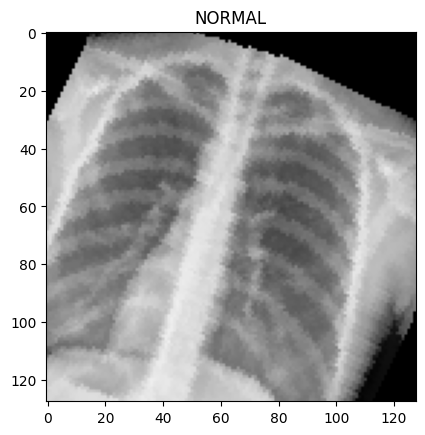

In [ ]:
img,label = trainset[20]
#print(trainset.class_to_idx)

class_name =["NORMAL","PNEUMONIA"]
show_image(img,class_name[label])

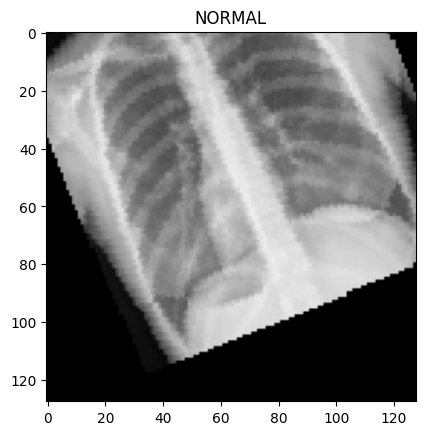

In [ ]:
img,label = trainset[20]
#print(trainset.class_to_idx)

class_name =["NORMAL","PNEUMONIA"]
show_image(img,class_name[label]) 

# randomly rotated

In [ ]:
from torch.utils.data import DataLoader
from torchvision.utils import make_grid

In [ ]:
trainloader = DataLoader(trainset,batch_size=CFG.batch_size,shuffle=True)
print("No. of batches in trainloader:{}".format(len(trainloader))) #Trainset Size:  5216 / batch_size: 16 = 326(No. of batches in trainloader) 
print("No. of Total examples:{}".format(len(trainloader.dataset)))

No. of batches in trainloader:28
No. of Total examples:3512


In [ ]:
validationloader = DataLoader(validateset,batch_size=CFG.batch_size,shuffle=True)
print("No. of batches in validationloader:{}".format(len(validationloader))) #validationset Size:  16 / batch_size: 16 = 1(No. of batches in validationloader) 
print("No. of Total examples:{}".format(len(validationloader.dataset)))

No. of batches in validationloader:10
No. of Total examples:1170


In [ ]:
testloader = DataLoader(testset,batch_size=CFG.batch_size,shuffle=True)
print("No. of batches in testloader:{}".format(len(testloader))) #testset Size:  624 / batch_size: 16 = 39(No. of batches in testloader) 
print("No. of Total examples:{}".format(len(testloader.dataset)))

No. of batches in testloader:10
No. of Total examples:1174


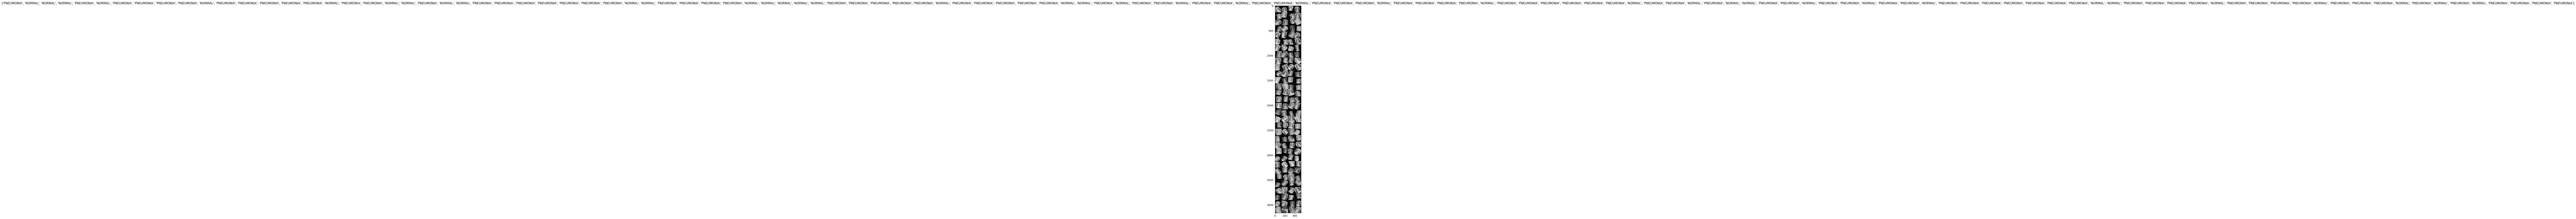

In [ ]:
dataiter = iter(trainloader)
images, labels = dataiter.__next__()

out = make_grid(images, nrow=4)

show_grid(out, title=[class_name[x] for x in labels])


In [ ]:
!pip install timm # install PyTorch Image Models

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 549.1/549.1 KB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.8/199.8 KB 23.3 MB/s eta 0:00:00


In [ ]:
from torch import nn
import torch.nn.functional as F
import timm # PyTorch Image Models

model = timm.create_model(CFG.model_name,pretrained=True) #load pretrained model

Downloading: "https://github.com/rwightman/pytorch-image-models/releases/download/v0.1-weights/tf_efficientnet_b2_ns-00306e48.pth" to /root/.cache/torch/hub/checkpoints/tf_efficientnet_b2_ns-00306e48.pth


In [ ]:
model

EfficientNet(
  (conv_stem): Conv2dSame(3, 32, kernel_size=(3, 3), stride=(2, 2), bias=False)
  (bn1): BatchNormAct2d(
    32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True
    (drop): Identity()
    (act): SiLU(inplace=True)
  )
  (blocks): Sequential(
    (0): Sequential(
      (0): DepthwiseSeparableConv(
        (conv_dw): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
        (bn1): BatchNormAct2d(
          32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True
          (drop): Identity()
          (act): SiLU(inplace=True)
        )
        (se): SqueezeExcite(
          (conv_reduce): Conv2d(32, 8, kernel_size=(1, 1), stride=(1, 1))
          (act1): SiLU(inplace=True)
          (conv_expand): Conv2d(8, 32, kernel_size=(1, 1), stride=(1, 1))
          (gate): Sigmoid()
        )
        (conv_pw): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn2): BatchNormAct2d(
          16, eps=

In [ ]:
#let's update the pretarined model:
for param in model.parameters():
  param.requires_grad=False

#orginally, it was:
#(classifier): Linear(in_features=1792, out_features=1000, bias=True)


#we are updating it as a 2-class classifier:
model.classifier = nn.Sequential(
    # nn.Flatten(),
    # nn.AdaptiveAvgPool2d((1, 1)), # GlobalAveragePooling2D equivalent
    nn.Linear(in_features=1408, out_features=128),
    nn.ReLU(),
    nn.Dropout(p=0.3),
    nn.Linear(in_features=128, out_features=64),
    nn.ReLU(),
    nn.Dropout(p=0.2),
    nn.Linear(in_features=64, out_features=2)
)


model

# after updatingnow it becomes:
#(classifier): Sequential(
#    (0): Linear(in_features=1792, out_features=625, bias=True)
#    (1): ReLU()
#    (2): Dropout(p=0.3, inplace=False)
#    (3): Linear(in_features=625, out_features=256, bias=True)
#    (4): ReLU()
#    (5): Linear(in_features=256, out_features=2, bias=True)
#  )

EfficientNet(
  (conv_stem): Conv2dSame(3, 32, kernel_size=(3, 3), stride=(2, 2), bias=False)
  (bn1): BatchNormAct2d(
    32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True
    (drop): Identity()
    (act): SiLU(inplace=True)
  )
  (blocks): Sequential(
    (0): Sequential(
      (0): DepthwiseSeparableConv(
        (conv_dw): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
        (bn1): BatchNormAct2d(
          32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True
          (drop): Identity()
          (act): SiLU(inplace=True)
        )
        (se): SqueezeExcite(
          (conv_reduce): Conv2d(32, 8, kernel_size=(1, 1), stride=(1, 1))
          (act1): SiLU(inplace=True)
          (conv_expand): Conv2d(8, 32, kernel_size=(1, 1), stride=(1, 1))
          (gate): Sigmoid()
        )
        (conv_pw): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn2): BatchNormAct2d(
          16, eps=

In [ ]:
from torchsummary import  summary
model.to(device) # move the model to GPU
summary(model,input_size=(3,128,128))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
        Conv2dSame-1           [-1, 32, 64, 64]             864
          Identity-2           [-1, 32, 64, 64]               0
              SiLU-3           [-1, 32, 64, 64]               0
    BatchNormAct2d-4           [-1, 32, 64, 64]              64
            Conv2d-5           [-1, 32, 64, 64]             288
          Identity-6           [-1, 32, 64, 64]               0
              SiLU-7           [-1, 32, 64, 64]               0
    BatchNormAct2d-8           [-1, 32, 64, 64]              64
            Conv2d-9              [-1, 8, 1, 1]             264
             SiLU-10              [-1, 8, 1, 1]               0
           Conv2d-11             [-1, 32, 1, 1]             288
          Sigmoid-12             [-1, 32, 1, 1]               0
    SqueezeExcite-13           [-1, 32, 64, 64]               0
           Conv2d-14           [-1, 16,

In [ ]:
class PneumoniaTrainer():
    
    def __init__(self, criterion=None, optimizer=None, scheduler=None):
        self.criterion = criterion
        self.optimizer = optimizer
        self.scheduler = scheduler
        
        self.train_losses = []
        self.train_accs = []
        self.val_losses = []
        self.val_accs = []
        
    def train_batch_loop(self, model, trainloader):
        train_loss = 0.0
        train_acc = 0.0

        for images, labels in tqdm(trainloader): 
            images = images.to(device)
            labels = labels.to(device)

            logits = model(images)
            loss = self.criterion(logits, labels)

            self.optimizer.zero_grad()
            loss.backward()
            self.optimizer.step()

            train_loss += loss.item()
            train_acc += accuracy(logits, labels)

        return train_loss / len(trainloader), train_acc / len(trainloader) 

    
    def valid_batch_loop(self, model, validloader):
        valid_loss = 0.0
        valid_acc = 0.0

        with torch.no_grad():
            for images, labels in tqdm(validloader):
                images = images.to(device)
                labels = labels.to(device)

                logits = model(images)
                loss = self.criterion(logits, labels)

                valid_loss += loss.item()
                valid_acc += accuracy(logits, labels)

        return valid_loss / len(validloader), valid_acc / len(validloader)
            
        
    def fit(self, model, trainloader, validloader, epochs):
        valid_min_loss = np.Inf 
        
        for epoch in range(epochs):
            model.train() 
            avg_train_loss, avg_train_acc = self.train_batch_loop(model, trainloader)
            
            model.eval() 
            avg_valid_loss, avg_valid_acc = self.valid_batch_loop(model, validloader)
            
            self.train_losses.append(avg_train_loss)
            self.train_accs.append(avg_train_acc)
            self.val_losses.append(avg_valid_loss)
            self.val_accs.append(avg_valid_acc)
            
            if avg_valid_loss <= valid_min_loss:
                print("Valid_loss decreased {} --> {}".format(valid_min_loss,avg_valid_loss))
                torch.save(model.state_dict(), 'ColabPneumoniaModel.pt')
                valid_min_loss = avg_valid_loss

                
            print("Epoch : {} Train Loss : {:.6f} Train Acc : {:.6f}".format(epoch+1, avg_train_loss, avg_train_acc))
            print("Epoch : {} Valid Loss : {:.6f} Valid Acc : {:.6f}".format(epoch+1, avg_valid_loss, avg_valid_acc))


    def plot_pr_curve(self, model, testloader):
        with torch.no_grad():
            model.eval()
            y_true = []
            y_scores = []
            for images, labels in tqdm(testloader):
                images = images.to(device)
                labels = labels.to(device)

                logits = model(images)
                probs = torch.softmax(logits, dim=1)
                y_true.extend(labels.cpu().numpy())
                y_scores.extend(probs[:, 1].cpu().numpy())

            precision, recall, _ = precision_recall_curve(y_true, y_scores)
            plt.plot(recall, precision, color='b', alpha=0.8)
            plt.xlabel('Recall')
            plt.ylabel('Precision')
            plt.title('PR Curve')
            plt.show()
    
    def plot_roc_curve(self, model, testloader):
        with torch.no_grad():
            model.eval()
            y_true = []
            y_scores = []
            for images, labels in tqdm(testloader):
                images = images.to(device)
                labels = labels.to(device)

                logits = model(images)
                probs = torch.softmax(logits, dim=1)
                y_true.extend(labels.cpu().numpy())
                y_scores.extend(probs[:, 1].cpu().numpy())

            fpr, tpr, _ = roc_curve(y_true, y_scores)
            roc_auc = auc(fpr, tpr)
            plt.plot(fpr, tpr, color='b', alpha=0.8, label='AUC = {:.2f}'.format(roc_auc))
            plt.plot([0, 1], [0, 1], color='r', linestyle='--')
            plt.xlabel('False Positive Rate')
            plt.ylabel('True Positive Rate')
            plt.title('ROC Curve')
            plt.legend()
            plt.show()


In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr = CFG.lr)

trainer = PneumoniaTrainer(criterion,optimizer)
trainer.fit(model,trainloader,validationloader,epochs = CFG.epochs)

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr = CFG.lr)

trainer = PneumoniaTrainer(criterion,optimizer)
trainer.fit(model,trainloader,validationloader,epochs = CFG.epochs)

  0%|          | 0/28 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

Valid_loss decreased inf --> 0.49194453954696654
Epoch : 1 Train Loss : 0.515354 Train Acc : 0.741709
Epoch : 1 Valid Loss : 0.491945 Valid Acc : 0.742274


  0%|          | 0/28 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

Valid_loss decreased 0.49194453954696654 --> 0.4475742012262344
Epoch : 2 Train Loss : 0.368003 Train Acc : 0.828962
Epoch : 2 Valid Loss : 0.447574 Valid Acc : 0.777691


  0%|          | 0/28 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch : 3 Train Loss : 0.357372 Train Acc : 0.842275
Epoch : 3 Valid Loss : 0.464064 Valid Acc : 0.777517


  0%|          | 0/28 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

Valid_loss decreased 0.4475742012262344 --> 0.4335231870412827
Epoch : 4 Train Loss : 0.334682 Train Acc : 0.849211
Epoch : 4 Valid Loss : 0.433523 Valid Acc : 0.794965


  0%|          | 0/28 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch : 5 Train Loss : 0.333575 Train Acc : 0.856944
Epoch : 5 Valid Loss : 0.435146 Valid Acc : 0.778472


  0%|          | 0/28 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch : 6 Train Loss : 0.337422 Train Acc : 0.845863
Epoch : 6 Valid Loss : 0.441893 Valid Acc : 0.777691


  0%|          | 0/28 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

Valid_loss decreased 0.4335231870412827 --> 0.3994017541408539
Epoch : 7 Train Loss : 0.317271 Train Acc : 0.858179
Epoch : 7 Valid Loss : 0.399402 Valid Acc : 0.812240


  0%|          | 0/28 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch : 8 Train Loss : 0.315594 Train Acc : 0.871253
Epoch : 8 Valid Loss : 0.451282 Valid Acc : 0.792795


  0%|          | 0/28 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch : 9 Train Loss : 0.303682 Train Acc : 0.869499
Epoch : 9 Valid Loss : 0.413354 Valid Acc : 0.797309


  0%|          | 0/28 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

Valid_loss decreased 0.3994017541408539 --> 0.39570828676223757
Epoch : 10 Train Loss : 0.293487 Train Acc : 0.874482
Epoch : 10 Valid Loss : 0.395708 Valid Acc : 0.805035


  0%|          | 0/28 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

Valid_loss decreased 0.39570828676223757 --> 0.39351212978363037
Epoch : 11 Train Loss : 0.296866 Train Acc : 0.864915
Epoch : 11 Valid Loss : 0.393512 Valid Acc : 0.814583


  0%|          | 0/28 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

Valid_loss decreased 0.39351212978363037 --> 0.37399332225322723
Epoch : 12 Train Loss : 0.290014 Train Acc : 0.870336
Epoch : 12 Valid Loss : 0.373993 Valid Acc : 0.826389


  0%|          | 0/28 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch : 13 Train Loss : 0.294665 Train Acc : 0.873485
Epoch : 13 Valid Loss : 0.393558 Valid Acc : 0.819184


  0%|          | 0/28 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

Valid_loss decreased 0.37399332225322723 --> 0.3643897622823715
Epoch : 14 Train Loss : 0.304473 Train Acc : 0.869141
Epoch : 14 Valid Loss : 0.364390 Valid Acc : 0.838194


  0%|          | 0/28 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

Valid_loss decreased 0.3643897622823715 --> 0.36388639360666275
Epoch : 15 Train Loss : 0.291719 Train Acc : 0.880301
Epoch : 15 Valid Loss : 0.363886 Valid Acc : 0.837326


  0%|          | 0/28 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch : 16 Train Loss : 0.287924 Train Acc : 0.876276
Epoch : 16 Valid Loss : 0.375894 Valid Acc : 0.830208


  0%|          | 0/28 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

Valid_loss decreased 0.36388639360666275 --> 0.35594330430030824
Epoch : 17 Train Loss : 0.271203 Train Acc : 0.888752
Epoch : 17 Valid Loss : 0.355943 Valid Acc : 0.846788


  0%|          | 0/28 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch : 18 Train Loss : 0.294693 Train Acc : 0.873007
Epoch : 18 Valid Loss : 0.396985 Valid Acc : 0.830035


  0%|          | 0/28 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

Valid_loss decreased 0.35594330430030824 --> 0.34940049797296524
Epoch : 19 Train Loss : 0.291282 Train Acc : 0.880102
Epoch : 19 Valid Loss : 0.349400 Valid Acc : 0.847569


  0%|          | 0/28 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch : 20 Train Loss : 0.281244 Train Acc : 0.879265
Epoch : 20 Valid Loss : 0.388702 Valid Acc : 0.810503


  0%|          | 0/28 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch : 21 Train Loss : 0.288949 Train Acc : 0.874880
Epoch : 21 Valid Loss : 0.352270 Valid Acc : 0.847569


  0%|          | 0/28 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch : 22 Train Loss : 0.280280 Train Acc : 0.878348
Epoch : 22 Valid Loss : 0.354490 Valid Acc : 0.843576


  0%|          | 0/28 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch : 23 Train Loss : 0.279466 Train Acc : 0.881298
Epoch : 23 Valid Loss : 0.350390 Valid Acc : 0.838108


  0%|          | 0/28 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch : 24 Train Loss : 0.274075 Train Acc : 0.887636
Epoch : 24 Valid Loss : 0.382430 Valid Acc : 0.826215


  0%|          | 0/28 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch : 25 Train Loss : 0.282558 Train Acc : 0.880102
Epoch : 25 Valid Loss : 0.359963 Valid Acc : 0.842101


  0%|          | 0/28 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch : 26 Train Loss : 0.273630 Train Acc : 0.885682
Epoch : 26 Valid Loss : 0.403726 Valid Acc : 0.826997


  0%|          | 0/28 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch : 27 Train Loss : 0.285548 Train Acc : 0.878109
Epoch : 27 Valid Loss : 0.416780 Valid Acc : 0.819792


  0%|          | 0/28 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch : 28 Train Loss : 0.295530 Train Acc : 0.872250
Epoch : 28 Valid Loss : 0.355333 Valid Acc : 0.831858


  0%|          | 0/28 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch : 29 Train Loss : 0.253927 Train Acc : 0.891980
Epoch : 29 Valid Loss : 0.429051 Valid Acc : 0.810417


  0%|          | 0/28 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch : 30 Train Loss : 0.277655 Train Acc : 0.885563
Epoch : 30 Valid Loss : 0.354242 Valid Acc : 0.838021


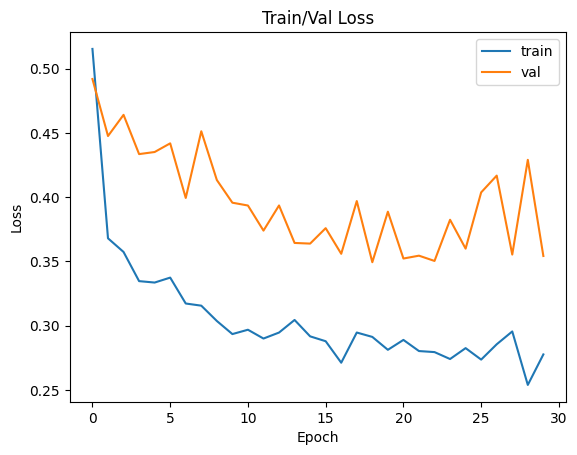

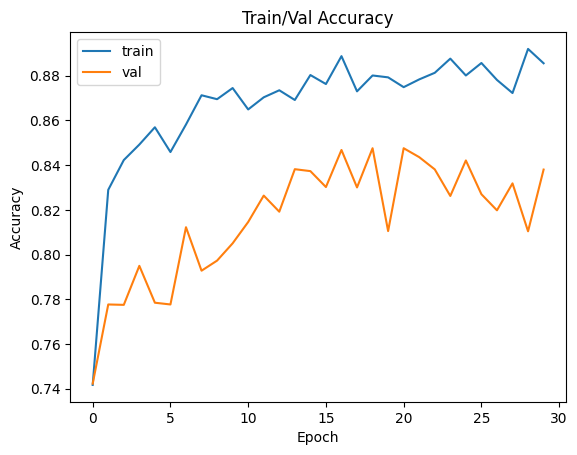

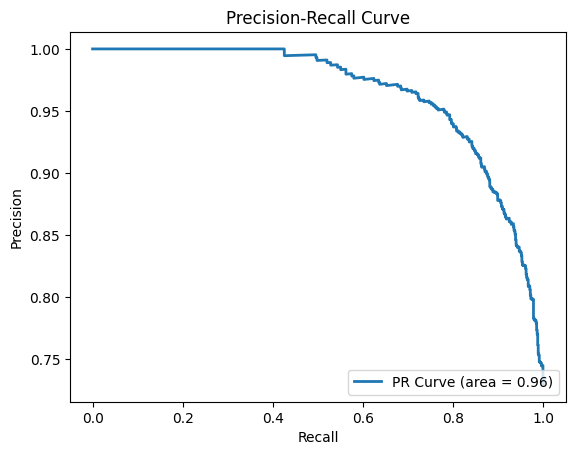

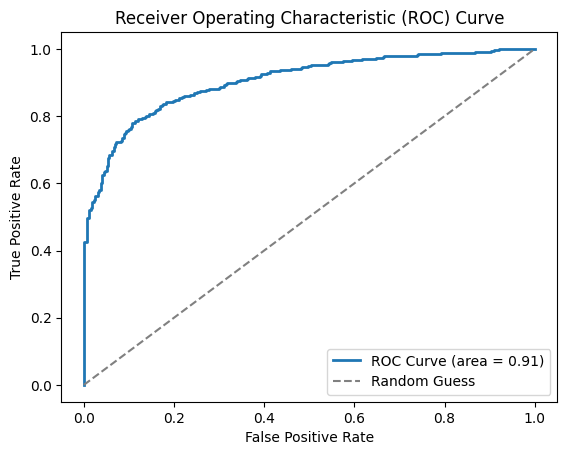

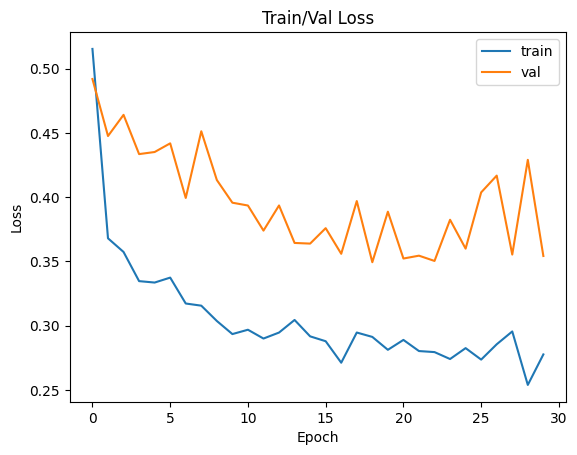

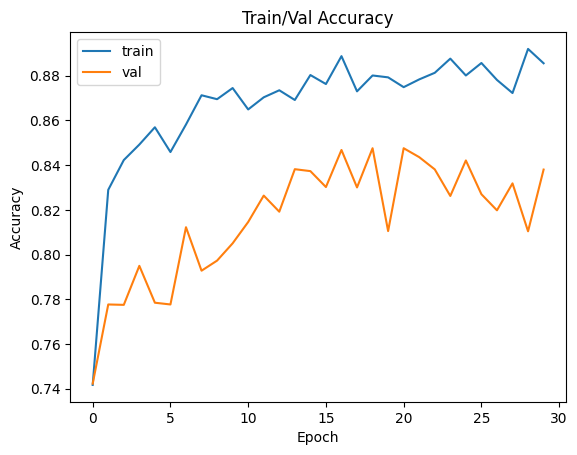

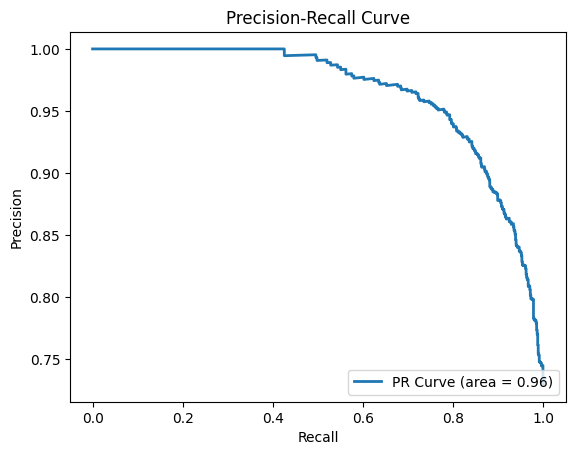

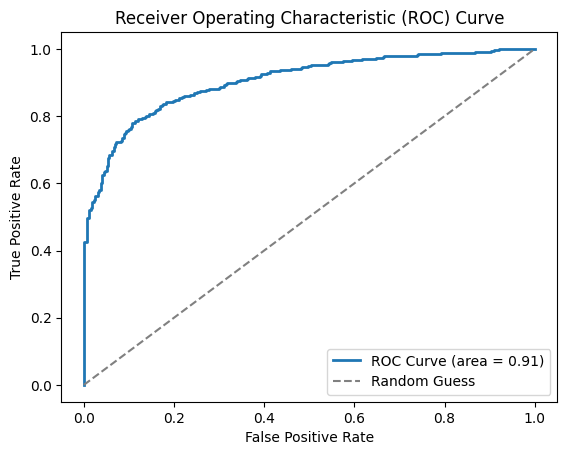

In [ ]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

train_losses = trainer.train_losses
val_losses = trainer.val_losses
train_accs = trainer.train_accs
val_accs = trainer.val_accs

# Plot losses
plt.plot(train_losses, label='train')
plt.plot(val_losses, label='val')
plt.title('Train/Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.savefig('11.pdf')
plt.show()

# Plot accuracies
plt.plot(train_accs, label='train')
plt.plot(val_accs, label='val')
plt.title('Train/Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig('21.pdf')
plt.show()

# PR curve
model.load_state_dict(torch.load('/content/ColabPneumoniaModel.pt'))
model.eval()
y_true, y_scores = [], []
with torch.no_grad():
    for images, labels in testloader:
        images = images.to(device)
        labels = labels.to(device)
        logits = model(images)
        probas = torch.softmax(logits, dim=1)
        y_true.extend(labels.cpu().numpy())
        y_scores.extend(probas[:, 1].cpu().numpy())
precision, recall, _ = precision_recall_curve(y_true, y_scores)
pr_auc = average_precision_score(y_true, y_scores)
plt.plot(recall, precision, lw=2, label='PR Curve (area = %0.2f)' % pr_auc)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower right")
plt.savefig('31.pdf')
plt.show()

# ROC curve
fpr, tpr, thresholds = roc_curve(y_true, y_scores)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, lw=2, label='ROC Curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], '--', color='gray', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.savefig('41.pdf')
plt.show()


  0%|          | 0/10 [00:00<?, ?it/s]

Test Loss : 0.337434
Test Acc : 0.839347
              precision    recall  f1-score   support

      Normal       0.69      0.70      0.69       318
   Pneumonia       0.89      0.88      0.89       856

    accuracy                           0.83      1174
   macro avg       0.79      0.79      0.79      1174
weighted avg       0.83      0.83      0.83      1174

AUC : 0.791634
Precision : 0.888235
Recall : 0.882009
F1 Score : 0.885111


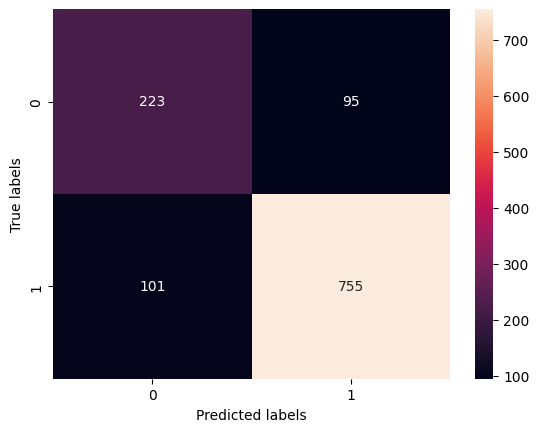

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, precision_score, recall_score, f1_score
import seaborn as sns

# Load the saved model
model.load_state_dict(torch.load('/content/ColabPneumoniaModel.pt'))
model.eval()

# Evaluate the model on the test set
avg_test_loss, avg_test_acc = trainer.valid_batch_loop(model,testloader)
print("Test Loss : {:.6f}".format(avg_test_loss))
print("Test Acc : {:.6f}".format(avg_test_acc))

# Evaluate the model's performance using a confusion matrix
true_labels = []
pred_labels = []

for images, labels in testloader:
    images = images.to(device)
    labels = labels.to(device)
    
    with torch.no_grad():
        logits = model(images)
    
    preds = torch.argmax(logits, dim=1)
    
    true_labels += labels.tolist()
    pred_labels += preds.tolist()

cm = confusion_matrix(true_labels, pred_labels)
sns.heatmap(cm, annot=True, fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')

# Save the confusion matrix as a PDF
plt.savefig('confusion_matrix2.pdf', dpi=300, bbox_inches='tight')

# Calculate and print classification report, AUC, precision, recall, and F1 score
target_names = ['Normal', 'Pneumonia']
print(classification_report(true_labels, pred_labels, target_names=target_names))

roc_auc = roc_auc_score(true_labels, pred_labels)
print("AUC : {:.6f}".format(roc_auc))

precision = precision_score(true_labels, pred_labels)
print("Precision : {:.6f}".format(precision))

recall = recall_score(true_labels, pred_labels)
print("Recall : {:.6f}".format(recall))

f1 = f1_score(true_labels, pred_labels)
print("F1 Score : {:.6f}".format(f1))


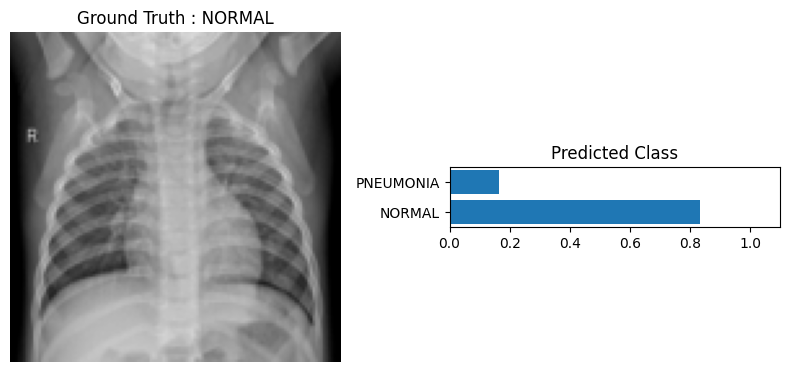

In [ ]:
import torch.nn.functional as F
import matplotlib.pyplot as plt

image, label = testset[300]

ps = model(image.to(device).unsqueeze(0))
ps = F.softmax(ps, dim=1)

view_classify(image, ps, label)

# Save the output as a PNG file
plt.savefig('output1.pdf')
plt.savefig('output1.png')

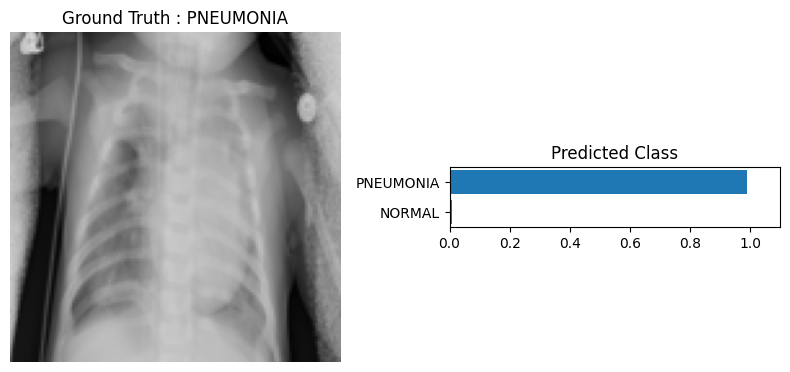

In [ ]:
import torch.nn.functional as F
import matplotlib.pyplot as plt

image, label = testset[320]

ps = model(image.to(device).unsqueeze(0))
ps = F.softmax(ps, dim=1)

view_classify(image, ps, label)

# Save the output as a PNG file
plt.savefig('output2.pdf')
plt.savefig('output2.png')

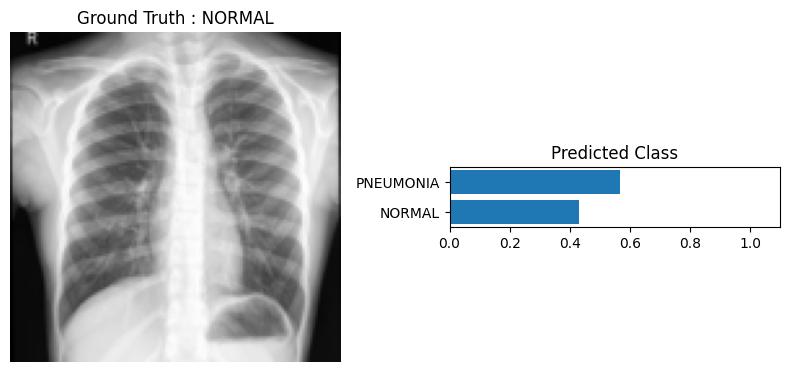

In [ ]:
import torch.nn.functional as F
import matplotlib.pyplot as plt

image, label = testset[5]

ps = model(image.to(device).unsqueeze(0))
ps = F.softmax(ps, dim=1)

view_classify(image, ps, label)

# Save the output as a PNG file
plt.savefig('output3.pdf')
plt.savefig('output3.png')


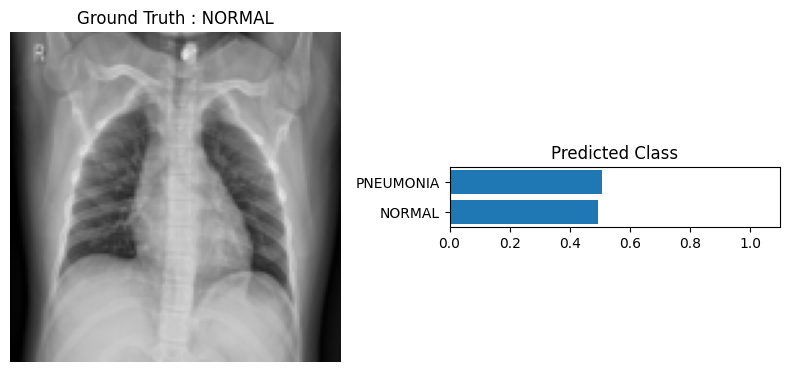

In [ ]:
import torch.nn.functional as F
import matplotlib.pyplot as plt

image, label = testset[8]

ps = model(image.to(device).unsqueeze(0))
ps = F.softmax(ps, dim=1)

view_classify(image, ps, label)

# Save the output as a PNG file
plt.savefig('output4.pdf')
plt.savefig('output4.png')

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr = CFG.lr)

trainer = PneumoniaTrainer(criterion,optimizer)
trainer.fit(model,trainloader,validationloader,epochs = CFG.epochs)

  0%|          | 0/28 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

Valid_loss decreased inf --> 0.4396961659193039
Epoch : 1 Train Loss : 0.300663 Train Acc : 0.869380
Epoch : 1 Valid Loss : 0.439696 Valid Acc : 0.790365


  0%|          | 0/28 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

Valid_loss decreased 0.4396961659193039 --> 0.409935799241066
Epoch : 2 Train Loss : 0.308170 Train Acc : 0.866430
Epoch : 2 Valid Loss : 0.409936 Valid Acc : 0.805295


  0%|          | 0/28 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch : 3 Train Loss : 0.307059 Train Acc : 0.864636
Epoch : 3 Valid Loss : 0.425894 Valid Acc : 0.796615


  0%|          | 0/28 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch : 4 Train Loss : 0.310287 Train Acc : 0.873485
Epoch : 4 Valid Loss : 0.426929 Valid Acc : 0.774479


  0%|          | 0/28 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch : 5 Train Loss : 0.294753 Train Acc : 0.873764
Epoch : 5 Valid Loss : 0.449454 Valid Acc : 0.779253


  0%|          | 0/28 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch : 6 Train Loss : 0.313688 Train Acc : 0.863082
Epoch : 6 Valid Loss : 0.416228 Valid Acc : 0.799045


  0%|          | 0/28 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch : 8 Train Loss : 0.306909 Train Acc : 0.870376
Epoch : 8 Valid Loss : 0.430944 Valid Acc : 0.788455


  0%|          | 0/28 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch : 9 Train Loss : 0.290392 Train Acc : 0.874522
Epoch : 9 Valid Loss : 0.423440 Valid Acc : 0.801215


  0%|          | 0/28 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch : 10 Train Loss : 0.305848 Train Acc : 0.871771
Epoch : 10 Valid Loss : 0.422113 Valid Acc : 0.805295


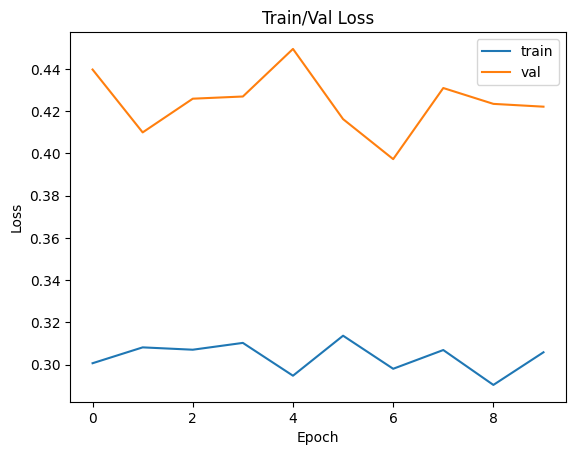

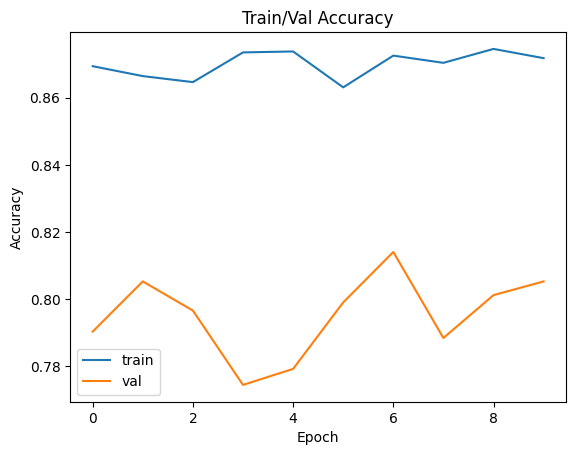

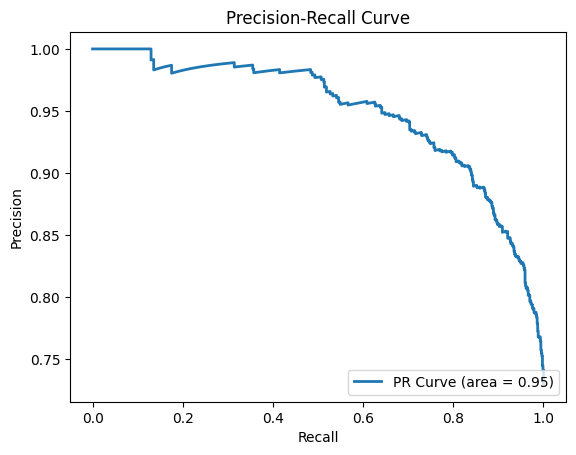

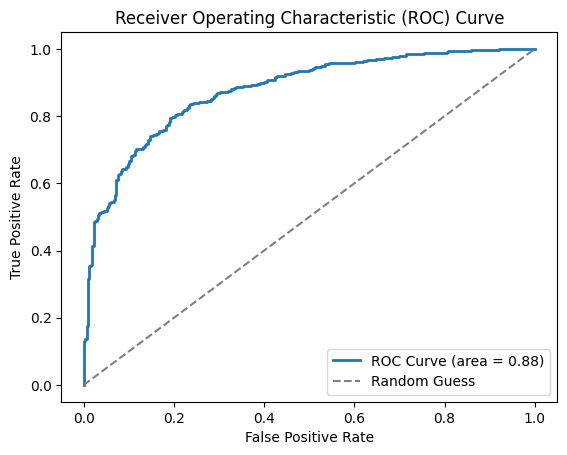

In [ ]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

train_losses = trainer.train_losses
val_losses = trainer.val_losses
train_accs = trainer.train_accs
val_accs = trainer.val_accs

# Plot losses
plt.plot(train_losses, label='train')
plt.plot(val_losses, label='val')
plt.title('Train/Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.savefig('11.pdf')
plt.show()

# Plot accuracies
plt.plot(train_accs, label='train')
plt.plot(val_accs, label='val')
plt.title('Train/Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig('21.pdf')
plt.show()

# PR curve
model.load_state_dict(torch.load('/content/ColabPneumoniaModel.pt'))
model.eval()
y_true, y_scores = [], []
with torch.no_grad():
    for images, labels in testloader:
        images = images.to(device)
        labels = labels.to(device)
        logits = model(images)
        probas = torch.softmax(logits, dim=1)
        y_true.extend(labels.cpu().numpy())
        y_scores.extend(probas[:, 1].cpu().numpy())
precision, recall, _ = precision_recall_curve(y_true, y_scores)
pr_auc = average_precision_score(y_true, y_scores)
plt.plot(recall, precision, lw=2, label='PR Curve (area = %0.2f)' % pr_auc)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower right")
plt.savefig('31.pdf')
plt.show()

# ROC curve
fpr, tpr, thresholds = roc_curve(y_true, y_scores)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, lw=2, label='ROC Curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], '--', color='gray', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.savefig('41.pdf')
plt.show()


  0%|          | 0/10 [00:00<?, ?it/s]

Test Loss : 0.393816
Test Acc : 0.820881
              precision    recall  f1-score   support

      Normal       0.68      0.64      0.66       318
   Pneumonia       0.87      0.89      0.88       856

    accuracy                           0.82      1174
   macro avg       0.78      0.76      0.77      1174
weighted avg       0.82      0.82      0.82      1174

AUC : 0.762704
Precision : 0.867882
Recall : 0.890187
F1 Score : 0.878893


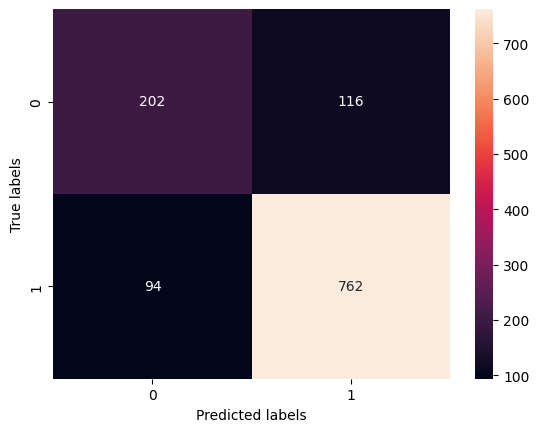

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, precision_score, recall_score, f1_score
import seaborn as sns

# Load the saved model
model.load_state_dict(torch.load('/content/ColabPneumoniaModel.pt'))
model.eval()

# Evaluate the model on the test set
avg_test_loss, avg_test_acc = trainer.valid_batch_loop(model,testloader)
print("Test Loss : {:.6f}".format(avg_test_loss))
print("Test Acc : {:.6f}".format(avg_test_acc))

# Evaluate the model's performance using a confusion matrix
true_labels = []
pred_labels = []

for images, labels in testloader:
    images = images.to(device)
    labels = labels.to(device)
    
    with torch.no_grad():
        logits = model(images)
    
    preds = torch.argmax(logits, dim=1)
    
    true_labels += labels.tolist()
    pred_labels += preds.tolist()

cm = confusion_matrix(true_labels, pred_labels)
sns.heatmap(cm, annot=True, fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')

# Save the confusion matrix as a PDF
plt.savefig('confusion_matrix2.pdf', dpi=300, bbox_inches='tight')

# Calculate and print classification report, AUC, precision, recall, and F1 score
target_names = ['Normal', 'Pneumonia']
print(classification_report(true_labels, pred_labels, target_names=target_names))

roc_auc = roc_auc_score(true_labels, pred_labels)
print("AUC : {:.6f}".format(roc_auc))

precision = precision_score(true_labels, pred_labels)
print("Precision : {:.6f}".format(precision))

recall = recall_score(true_labels, pred_labels)
print("Recall : {:.6f}".format(recall))

f1 = f1_score(true_labels, pred_labels)
print("F1 Score : {:.6f}".format(f1))


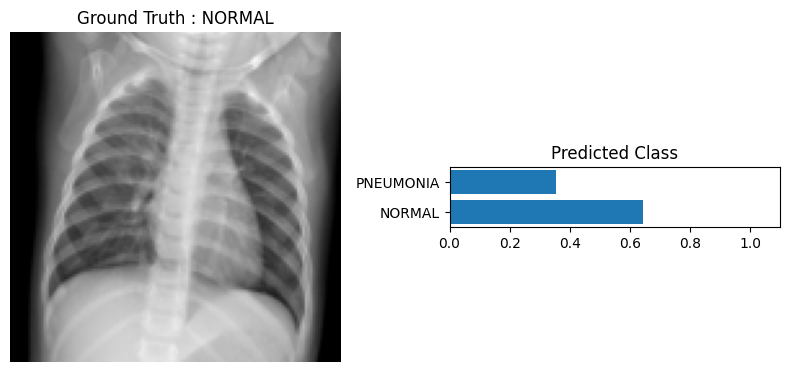

In [ ]:
import torch.nn.functional as F
import matplotlib.pyplot as plt

image, label = testset[300]

ps = model(image.to(device).unsqueeze(0))
ps = F.softmax(ps, dim=1)

view_classify(image, ps, label)

# Save the output as a PNG file
plt.savefig('output1.pdf')


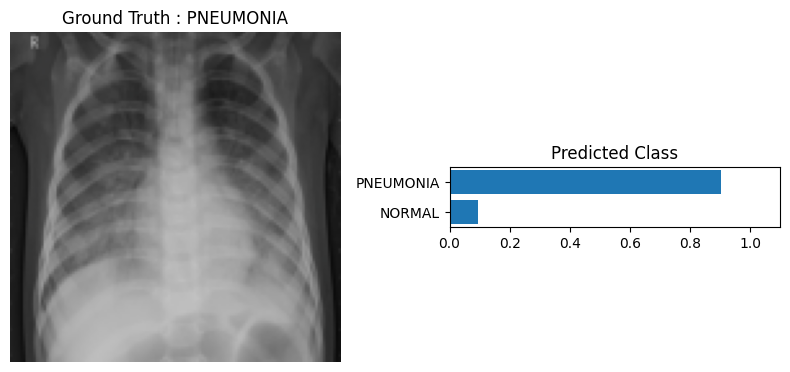

In [ ]:
import torch.nn.functional as F
import matplotlib.pyplot as plt

image, label = testset[320]

ps = model(image.to(device).unsqueeze(0))
ps = F.softmax(ps, dim=1)

view_classify(image, ps, label)

# Save the output as a PNG file
plt.savefig('output2.pdf')


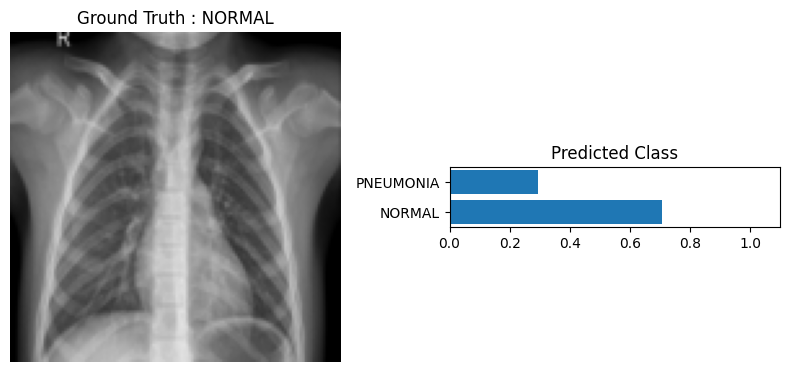

In [ ]:
import torch.nn.functional as F
import matplotlib.pyplot as plt

image, label = testset[5]

ps = model(image.to(device).unsqueeze(0))
ps = F.softmax(ps, dim=1)

view_classify(image, ps, label)

# Save the output as a PNG file
plt.savefig('output3.pdf')


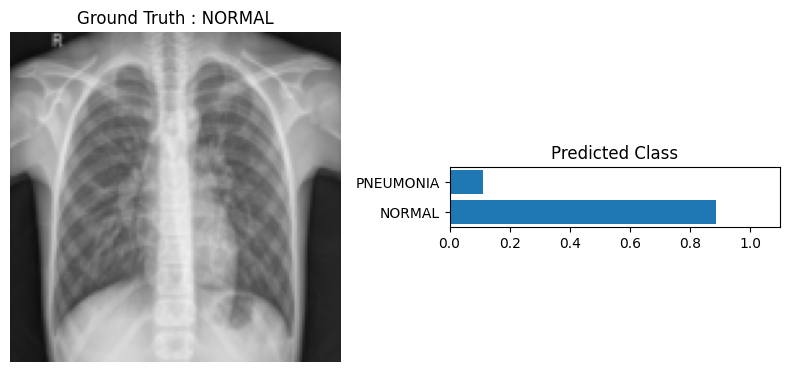

In [ ]:
import torch.nn.functional as F
import matplotlib.pyplot as plt

image, label = testset[8]

ps = model(image.to(device).unsqueeze(0))
ps = F.softmax(ps, dim=1)

view_classify(image, ps, label)

# Save the output as a PNG file
plt.savefig('output4.pdf')


In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr = CFG.lr)

trainer = PneumoniaTrainer(criterion,optimizer)
trainer.fit(model,trainloader,validationloader,epochs = CFG.epochs)

  0%|          | 0/28 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

Valid_loss decreased inf --> 0.5046179085969925
Epoch : 1 Train Loss : 0.378590 Train Acc : 0.830078
Epoch : 1 Valid Loss : 0.504618 Valid Acc : 0.777778


  0%|          | 0/28 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

Valid_loss decreased 0.5046179085969925 --> 0.44771779179573057
Epoch : 2 Train Loss : 0.331743 Train Acc : 0.856306
Epoch : 2 Valid Loss : 0.447718 Valid Acc : 0.788628


  0%|          | 0/28 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch : 3 Train Loss : 0.323846 Train Acc : 0.859056
Epoch : 3 Valid Loss : 0.447792 Valid Acc : 0.793229


  0%|          | 0/28 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch : 4 Train Loss : 0.329102 Train Acc : 0.856505
Epoch : 4 Valid Loss : 0.514498 Valid Acc : 0.771267


  0%|          | 0/28 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch : 5 Train Loss : 0.325757 Train Acc : 0.862763
Epoch : 5 Valid Loss : 0.465004 Valid Acc : 0.767274


  0%|          | 0/28 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch : 6 Train Loss : 0.311675 Train Acc : 0.867227
Epoch : 6 Valid Loss : 0.456961 Valid Acc : 0.795052


  0%|          | 0/28 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

Valid_loss decreased 0.44771779179573057 --> 0.4393147498369217
Epoch : 7 Train Loss : 0.325199 Train Acc : 0.862723
Epoch : 7 Valid Loss : 0.439315 Valid Acc : 0.779340


  0%|          | 0/28 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch : 8 Train Loss : 0.315641 Train Acc : 0.858936
Epoch : 8 Valid Loss : 0.447051 Valid Acc : 0.788108


  0%|          | 0/28 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch : 9 Train Loss : 0.313144 Train Acc : 0.867068
Epoch : 9 Valid Loss : 0.448861 Valid Acc : 0.784115


  0%|          | 0/28 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch : 10 Train Loss : 0.312407 Train Acc : 0.869739
Epoch : 10 Valid Loss : 0.484581 Valid Acc : 0.781076


  0%|          | 0/28 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch : 11 Train Loss : 0.317805 Train Acc : 0.865314
Epoch : 11 Valid Loss : 0.477078 Valid Acc : 0.784983


  0%|          | 0/28 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch : 12 Train Loss : 0.308790 Train Acc : 0.864397
Epoch : 12 Valid Loss : 0.486665 Valid Acc : 0.777083


  0%|          | 0/28 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch : 13 Train Loss : 0.304785 Train Acc : 0.866669
Epoch : 13 Valid Loss : 0.538354 Valid Acc : 0.750087


  0%|          | 0/28 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

Valid_loss decreased 0.4393147498369217 --> 0.4285596936941147
Epoch : 14 Train Loss : 0.298201 Train Acc : 0.877910
Epoch : 14 Valid Loss : 0.428560 Valid Acc : 0.788542


  0%|          | 0/28 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

Valid_loss decreased 0.4285596936941147 --> 0.3860184833407402
Epoch : 15 Train Loss : 0.308656 Train Acc : 0.869858
Epoch : 15 Valid Loss : 0.386018 Valid Acc : 0.819444


  0%|          | 0/28 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch : 16 Train Loss : 0.317119 Train Acc : 0.864278
Epoch : 16 Valid Loss : 0.396622 Valid Acc : 0.819184


  0%|          | 0/28 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch : 17 Train Loss : 0.294940 Train Acc : 0.872369
Epoch : 17 Valid Loss : 0.447049 Valid Acc : 0.792361


  0%|          | 0/28 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch : 18 Train Loss : 0.291731 Train Acc : 0.875080
Epoch : 18 Valid Loss : 0.407609 Valid Acc : 0.813021


  0%|          | 0/28 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch : 19 Train Loss : 0.308116 Train Acc : 0.870735
Epoch : 19 Valid Loss : 0.452359 Valid Acc : 0.797396


  0%|          | 0/28 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch : 20 Train Loss : 0.304044 Train Acc : 0.869300
Epoch : 20 Valid Loss : 0.417787 Valid Acc : 0.812413


  0%|          | 0/28 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch : 21 Train Loss : 0.312355 Train Acc : 0.866470
Epoch : 21 Valid Loss : 0.413832 Valid Acc : 0.801129


  0%|          | 0/28 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch : 22 Train Loss : 0.287942 Train Acc : 0.875000
Epoch : 22 Valid Loss : 0.426515 Valid Acc : 0.796528


  0%|          | 0/28 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch : 23 Train Loss : 0.307522 Train Acc : 0.870615
Epoch : 23 Valid Loss : 0.482115 Valid Acc : 0.776128


  0%|          | 0/28 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch : 24 Train Loss : 0.316320 Train Acc : 0.863879
Epoch : 24 Valid Loss : 0.418262 Valid Acc : 0.802170


  0%|          | 0/28 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch : 25 Train Loss : 0.301693 Train Acc : 0.865952
Epoch : 25 Valid Loss : 0.429475 Valid Acc : 0.799826


  0%|          | 0/28 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch : 26 Train Loss : 0.304845 Train Acc : 0.869898
Epoch : 26 Valid Loss : 0.398192 Valid Acc : 0.814583


  0%|          | 0/28 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch : 27 Train Loss : 0.299284 Train Acc : 0.876913
Epoch : 27 Valid Loss : 0.427165 Valid Acc : 0.791146


  0%|          | 0/28 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch : 28 Train Loss : 0.293517 Train Acc : 0.882294
Epoch : 28 Valid Loss : 0.409694 Valid Acc : 0.805382


  0%|          | 0/28 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch : 29 Train Loss : 0.304113 Train Acc : 0.868463
Epoch : 29 Valid Loss : 0.434696 Valid Acc : 0.802865


  0%|          | 0/28 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch : 30 Train Loss : 0.286197 Train Acc : 0.876395
Epoch : 30 Valid Loss : 0.449903 Valid Acc : 0.788802


In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr = CFG.lr)

trainer = PneumoniaTrainer(criterion,optimizer)
trainer.fit(model,trainloader,validationloader,epochs = CFG.epochs)

  0%|          | 0/28 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

Valid_loss decreased inf --> 0.5046179085969925
Epoch : 1 Train Loss : 0.378590 Train Acc : 0.830078
Epoch : 1 Valid Loss : 0.504618 Valid Acc : 0.777778


  0%|          | 0/28 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

Valid_loss decreased 0.5046179085969925 --> 0.44771779179573057
Epoch : 2 Train Loss : 0.331743 Train Acc : 0.856306
Epoch : 2 Valid Loss : 0.447718 Valid Acc : 0.788628


  0%|          | 0/28 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch : 3 Train Loss : 0.323846 Train Acc : 0.859056
Epoch : 3 Valid Loss : 0.447792 Valid Acc : 0.793229


  0%|          | 0/28 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch : 4 Train Loss : 0.329102 Train Acc : 0.856505
Epoch : 4 Valid Loss : 0.514498 Valid Acc : 0.771267


  0%|          | 0/28 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch : 5 Train Loss : 0.325757 Train Acc : 0.862763
Epoch : 5 Valid Loss : 0.465004 Valid Acc : 0.767274


  0%|          | 0/28 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch : 6 Train Loss : 0.311675 Train Acc : 0.867227
Epoch : 6 Valid Loss : 0.456961 Valid Acc : 0.795052


  0%|          | 0/28 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

Valid_loss decreased 0.44771779179573057 --> 0.4393147498369217
Epoch : 7 Train Loss : 0.325199 Train Acc : 0.862723
Epoch : 7 Valid Loss : 0.439315 Valid Acc : 0.779340


  0%|          | 0/28 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch : 8 Train Loss : 0.315641 Train Acc : 0.858936
Epoch : 8 Valid Loss : 0.447051 Valid Acc : 0.788108


  0%|          | 0/28 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch : 9 Train Loss : 0.313144 Train Acc : 0.867068
Epoch : 9 Valid Loss : 0.448861 Valid Acc : 0.784115


  0%|          | 0/28 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch : 10 Train Loss : 0.312407 Train Acc : 0.869739
Epoch : 10 Valid Loss : 0.484581 Valid Acc : 0.781076


  0%|          | 0/28 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch : 11 Train Loss : 0.317805 Train Acc : 0.865314
Epoch : 11 Valid Loss : 0.477078 Valid Acc : 0.784983


  0%|          | 0/28 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch : 12 Train Loss : 0.308790 Train Acc : 0.864397
Epoch : 12 Valid Loss : 0.486665 Valid Acc : 0.777083


  0%|          | 0/28 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch : 13 Train Loss : 0.304785 Train Acc : 0.866669
Epoch : 13 Valid Loss : 0.538354 Valid Acc : 0.750087


  0%|          | 0/28 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

Valid_loss decreased 0.4393147498369217 --> 0.4285596936941147
Epoch : 14 Train Loss : 0.298201 Train Acc : 0.877910
Epoch : 14 Valid Loss : 0.428560 Valid Acc : 0.788542


  0%|          | 0/28 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

Valid_loss decreased 0.4285596936941147 --> 0.3860184833407402
Epoch : 15 Train Loss : 0.308656 Train Acc : 0.869858
Epoch : 15 Valid Loss : 0.386018 Valid Acc : 0.819444


  0%|          | 0/28 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch : 16 Train Loss : 0.317119 Train Acc : 0.864278
Epoch : 16 Valid Loss : 0.396622 Valid Acc : 0.819184


  0%|          | 0/28 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch : 17 Train Loss : 0.294940 Train Acc : 0.872369
Epoch : 17 Valid Loss : 0.447049 Valid Acc : 0.792361


  0%|          | 0/28 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch : 18 Train Loss : 0.291731 Train Acc : 0.875080
Epoch : 18 Valid Loss : 0.407609 Valid Acc : 0.813021


  0%|          | 0/28 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch : 19 Train Loss : 0.308116 Train Acc : 0.870735
Epoch : 19 Valid Loss : 0.452359 Valid Acc : 0.797396


  0%|          | 0/28 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch : 20 Train Loss : 0.304044 Train Acc : 0.869300
Epoch : 20 Valid Loss : 0.417787 Valid Acc : 0.812413


  0%|          | 0/28 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch : 21 Train Loss : 0.312355 Train Acc : 0.866470
Epoch : 21 Valid Loss : 0.413832 Valid Acc : 0.801129


  0%|          | 0/28 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch : 22 Train Loss : 0.287942 Train Acc : 0.875000
Epoch : 22 Valid Loss : 0.426515 Valid Acc : 0.796528


  0%|          | 0/28 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch : 23 Train Loss : 0.307522 Train Acc : 0.870615
Epoch : 23 Valid Loss : 0.482115 Valid Acc : 0.776128


  0%|          | 0/28 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch : 24 Train Loss : 0.316320 Train Acc : 0.863879
Epoch : 24 Valid Loss : 0.418262 Valid Acc : 0.802170


  0%|          | 0/28 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch : 25 Train Loss : 0.301693 Train Acc : 0.865952
Epoch : 25 Valid Loss : 0.429475 Valid Acc : 0.799826


  0%|          | 0/28 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch : 26 Train Loss : 0.304845 Train Acc : 0.869898
Epoch : 26 Valid Loss : 0.398192 Valid Acc : 0.814583


  0%|          | 0/28 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch : 27 Train Loss : 0.299284 Train Acc : 0.876913
Epoch : 27 Valid Loss : 0.427165 Valid Acc : 0.791146


  0%|          | 0/28 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch : 28 Train Loss : 0.293517 Train Acc : 0.882294
Epoch : 28 Valid Loss : 0.409694 Valid Acc : 0.805382


  0%|          | 0/28 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch : 29 Train Loss : 0.304113 Train Acc : 0.868463
Epoch : 29 Valid Loss : 0.434696 Valid Acc : 0.802865


  0%|          | 0/28 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch : 30 Train Loss : 0.286197 Train Acc : 0.876395
Epoch : 30 Valid Loss : 0.449903 Valid Acc : 0.788802


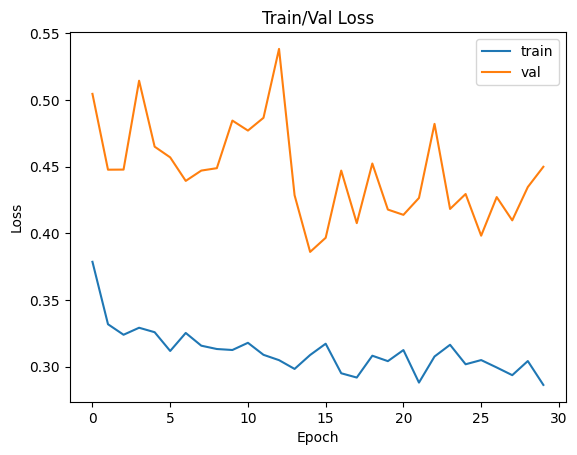

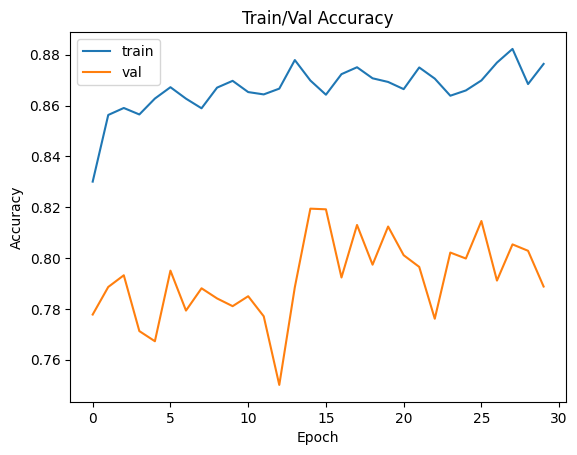

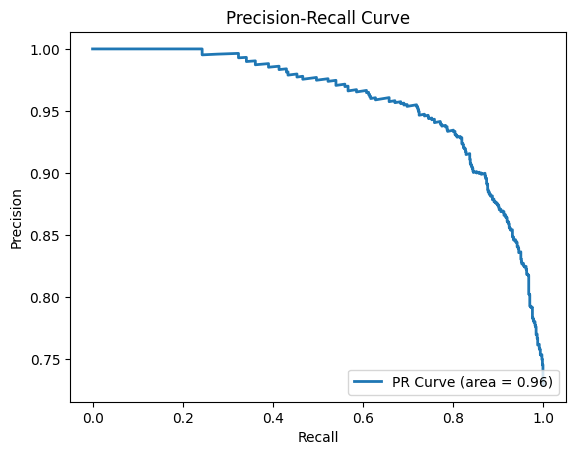

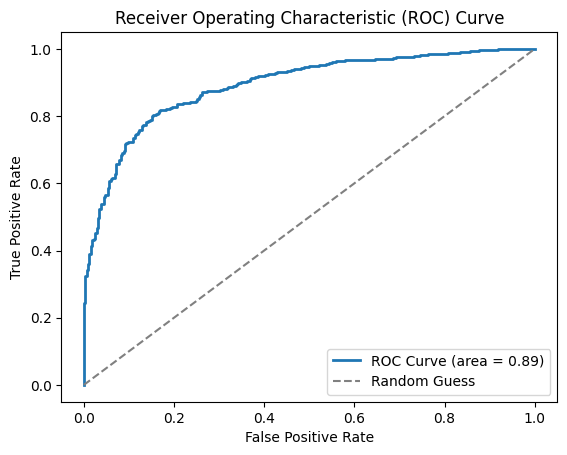

In [ ]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

train_losses = trainer.train_losses
val_losses = trainer.val_losses
train_accs = trainer.train_accs
val_accs = trainer.val_accs

# Plot losses
plt.plot(train_losses, label='train')
plt.plot(val_losses, label='val')
plt.title('Train/Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.savefig('1.pdf')
plt.show()

# Plot accuracies
plt.plot(train_accs, label='train')
plt.plot(val_accs, label='val')
plt.title('Train/Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig('2.pdf')
plt.show()

# PR curve
model.load_state_dict(torch.load('/content/ColabPneumoniaModel.pt'))
model.eval()
y_true, y_scores = [], []
with torch.no_grad():
    for images, labels in testloader:
        images = images.to(device)
        labels = labels.to(device)
        logits = model(images)
        probas = torch.softmax(logits, dim=1)
        y_true.extend(labels.cpu().numpy())
        y_scores.extend(probas[:, 1].cpu().numpy())
precision, recall, _ = precision_recall_curve(y_true, y_scores)
pr_auc = average_precision_score(y_true, y_scores)
plt.plot(recall, precision, lw=2, label='PR Curve (area = %0.2f)' % pr_auc)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower right")
plt.savefig('3.pdf')
plt.show()

# ROC curve
fpr, tpr, thresholds = roc_curve(y_true, y_scores)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, lw=2, label='ROC Curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], '--', color='gray', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.savefig('4.pdf')
plt.show()


In [ ]:
model.load_state_dict(torch.load('/content/ColabPneumoniaModel.pt'))
model.eval()

avg_test_loss, avg_test_acc = trainer.valid_batch_loop(model,testloader)


print("Test Loss : {}".format(avg_test_loss))
print("Test Acc : {}".format(avg_test_acc))

  0%|          | 0/10 [00:00<?, ?it/s]

Test Loss : 0.24973762929439544
Test Acc : 0.9113636016845703


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, precision_score, recall_score, f1_score
import seaborn as sns

# Load the saved model
model.load_state_dict(torch.load('/content/ColabPneumoniaModel.pt'))
model.eval()

# Evaluate the model on the test set
avg_test_loss, avg_test_acc = trainer.valid_batch_loop(model,testloader)
print("Test Loss : {:.6f}".format(avg_test_loss))
print("Test Acc : {:.6f}".format(avg_test_acc))

# Evaluate the model's performance using a confusion matrix
true_labels = []
pred_labels = []

for images, labels in testloader:
    images = images.to(device)
    labels = labels.to(device)
    
    with torch.no_grad():
        logits = model(images)
    
    preds = torch.argmax(logits, dim=1)
    
    true_labels += labels.tolist()
    pred_labels += preds.tolist()

cm = confusion_matrix(true_labels, pred_labels)
sns.heatmap(cm, annot=True, fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')

# Save the confusion matrix as a PDF
plt.savefig('confusion_matrix.pdf', dpi=300, bbox_inches='tight')

# Calculate and print classification report, AUC, precision, recall, and F1 score
target_names = ['Normal', 'Pneumonia']
print(classification_report(true_labels, pred_labels, target_names=target_names))

roc_auc = roc_auc_score(true_labels, pred_labels)
print("AUC : {:.6f}".format(roc_auc))

precision = precision_score(true_labels, pred_labels)
print("Precision : {:.6f}".format(precision))

recall = recall_score(true_labels, pred_labels)
print("Recall : {:.6f}".format(recall))

f1 = f1_score(true_labels, pred_labels)
print("F1 Score : {:.6f}".format(f1))


  0%|          | 0/10 [00:00<?, ?it/s]

Test Loss : 0.360127
Test Acc : 0.836364
              precision    recall  f1-score   support

      Normal       0.74      0.60      0.66       318
   Pneumonia       0.86      0.92      0.89       856

    accuracy                           0.83      1174
   macro avg       0.80      0.76      0.78      1174
weighted avg       0.83      0.83      0.83      1174

AUC : 0.759607
Precision : 0.860414
Recall : 0.921729
F1 Score : 0.890017


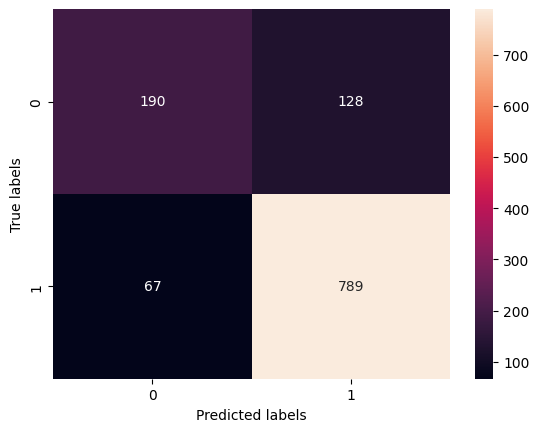

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, precision_score, recall_score, f1_score
import seaborn as sns

# Load the saved model
model.load_state_dict(torch.load('/content/ColabPneumoniaModel.pt'))
model.eval()

# Evaluate the model on the test set
avg_test_loss, avg_test_acc = trainer.valid_batch_loop(model,testloader)
print("Test Loss : {:.6f}".format(avg_test_loss))
print("Test Acc : {:.6f}".format(avg_test_acc))

# Evaluate the model's performance using a confusion matrix
true_labels = []
pred_labels = []

for images, labels in testloader:
    images = images.to(device)
    labels = labels.to(device)
    
    with torch.no_grad():
        logits = model(images)
    
    preds = torch.argmax(logits, dim=1)
    
    true_labels += labels.tolist()
    pred_labels += preds.tolist()

cm = confusion_matrix(true_labels, pred_labels)
sns.heatmap(cm, annot=True, fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')

# Save the confusion matrix as a PDF
plt.savefig('confusion_matrix.pdf', dpi=300, bbox_inches='tight')

# Calculate and print classification report, AUC, precision, recall, and F1 score
target_names = ['Normal', 'Pneumonia']
print(classification_report(true_labels, pred_labels, target_names=target_names))

roc_auc = roc_auc_score(true_labels, pred_labels)
print("AUC : {:.6f}".format(roc_auc))

precision = precision_score(true_labels, pred_labels)
print("Precision : {:.6f}".format(precision))

recall = recall_score(true_labels, pred_labels)
print("Recall : {:.6f}".format(recall))

f1 = f1_score(true_labels, pred_labels)
print("F1 Score : {:.6f}".format(f1))


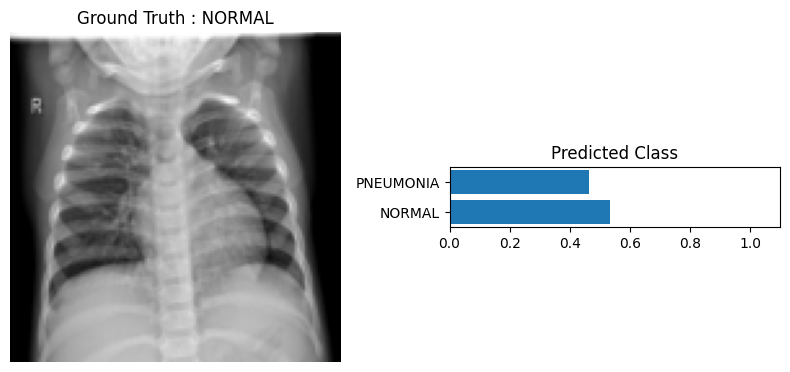

In [ ]:
import torch.nn.functional as F

image,label = testset[15]

ps = model(image.to(device).unsqueeze(0))
ps = F.softmax(ps,dim = 1)

view_classify(image,ps,label)

In [ ]:
import torch.nn.functional as F

image,label = testset[5]

ps = model(image.to(device).unsqueeze(0))
ps = F.softmax(ps,dim = 1)

view_classify(image,ps,label)

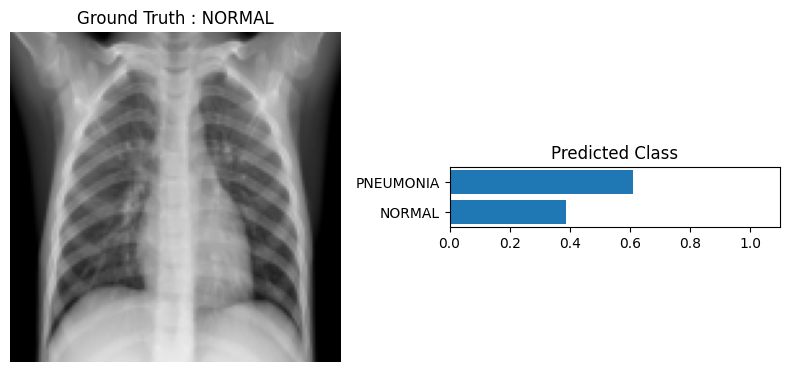

In [ ]:
import torch.nn.functional as F

image,label = testset[10]

ps = model(image.to(device).unsqueeze(0))
ps = F.softmax(ps,dim = 1)

view_classify(image,ps,label)

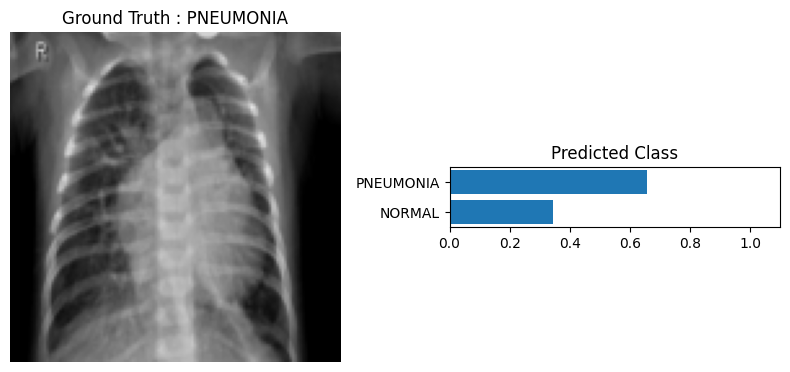

In [ ]:
import torch.nn.functional as F

image,label = testset[324]

ps = model(image.to(device).unsqueeze(0))
ps = F.softmax(ps,dim = 1)

view_classify(image,ps,label)

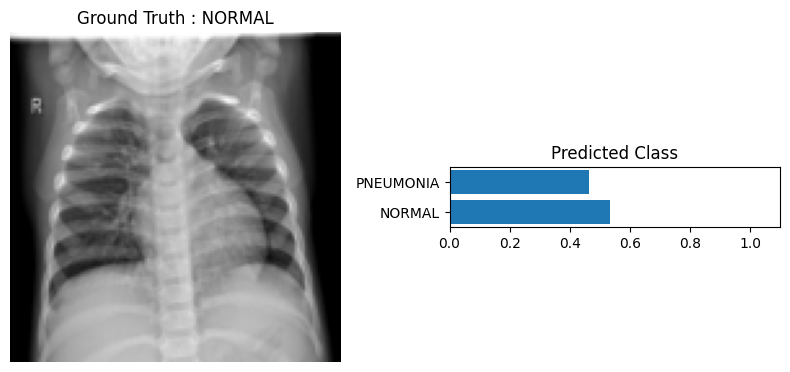

In [ ]:
import torch.nn.functional as F
import matplotlib.pyplot as plt

image, label = testset[15]

ps = model(image.to(device).unsqueeze(0))
ps = F.softmax(ps, dim=1)

view_classify(image, ps, label)

# Save the output as a PNG file
plt.savefig('output.png')


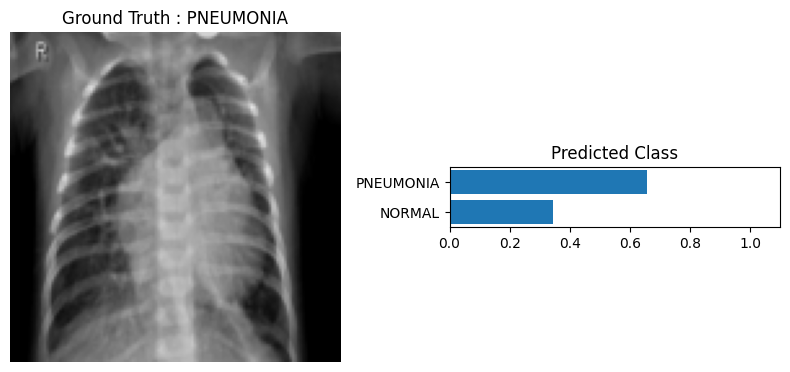

In [ ]:
import torch.nn.functional as F
import matplotlib.pyplot as plt

image, label = testset[324]

ps = model(image.to(device).unsqueeze(0))
ps = F.softmax(ps, dim=1)

view_classify(image, ps, label)

# Save the output as a PNG file
plt.savefig('output.png')


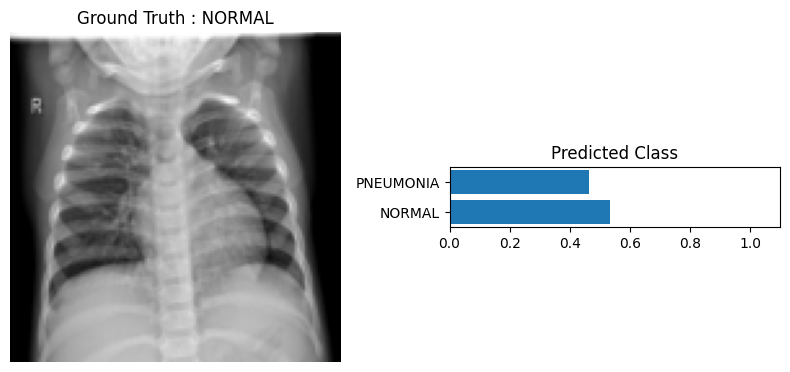

In [ ]:
import torch.nn.functional as F
import matplotlib.pyplot as plt

image, label = testset[15]

ps = model(image.to(device).unsqueeze(0))
ps = F.softmax(ps, dim=1)

view_classify(image, ps, label)

# Save the output as a PNG file
plt.savefig('output.pdf')


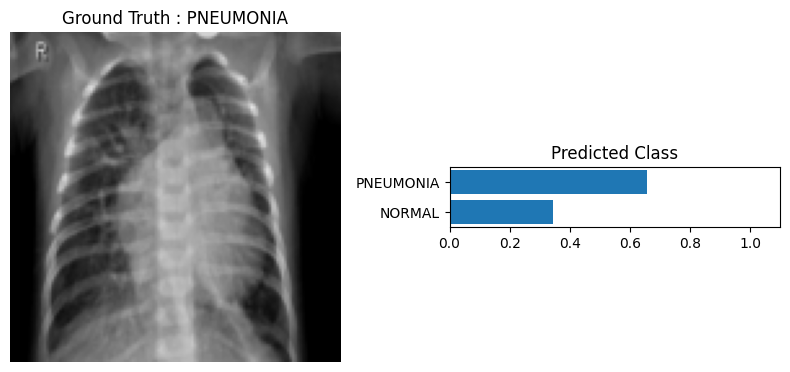

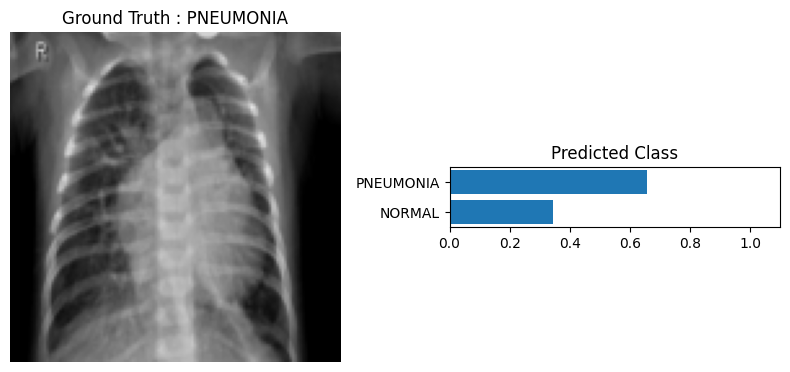

In [ ]:
import torch.nn.functional as F
import matplotlib.pyplot as plt

image, label = testset[324]

ps = model(image.to(device).unsqueeze(0))
ps = F.softmax(ps, dim=1)

view_classify(image, ps, label)

# Save the output as a PNG file
plt.savefig('output.pdf')
